In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import sklearn as skl
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.cluster import Birch

In [ ]:
 mydata = pd.read_csv('drive/My Drive/DM/HR_comma_sep.csv', header=None,  
                          names = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
                                   'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department','salary',
                                   'left'], sep = ',')
#mydata= pd.read_csv("C:/Users/Fareeda nawaz/HR_comma_sep.csv")

In [ ]:
data = mydata.iloc[1:,:]
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,14999,14999,14999,14999,14999,14999,14999,14999,14999,14999
unique,92,65,6,215,8,2,2,10,3,2
top,0.1,0.55,4,135,3,0,0,sales,low,0
freq,358,358,4365,153,6443,12830,14680,4140,7316,11428


In [ ]:
print(data.department.unique())
print(data.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [ ]:
def convertData (data):

  data.department =data.department.replace(to_replace ='sales',value= '0')
  data.department =data.department.replace(to_replace ='accounting',value= '1')
  data.department =data.department.replace(to_replace ='hr',value= '2')
  data.department =data.department.replace(to_replace ='technical',value= '3')
  data.department =data.department.replace(to_replace ='support',value= '4')
  data.department =data.department.replace(to_replace ='management',value= '5')
  data.department =data.department.replace(to_replace ='IT',value= '6')
  data.department =data.department.replace(to_replace ='product_mng',value= '7')
  data.department =data.department.replace(to_replace ='marketing',value= '8')
  data.department =data.department.replace(to_replace ='RandD',value= '9')

  data.salary =data.salary.replace(to_replace ='low',value= '0')
  data.salary =data.salary.replace(to_replace ='medium',value= '1')
  data.salary =data.salary.replace(to_replace ='high',value= '2')

  data = data.astype(float)

  return data

In [ ]:
data = convertData(data)

print(data.department.unique())
print(data.salary.unique())
data.describe()

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2.]


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000,1.000000


In [ ]:
data = data.astype(float)
correlation = data.corr()

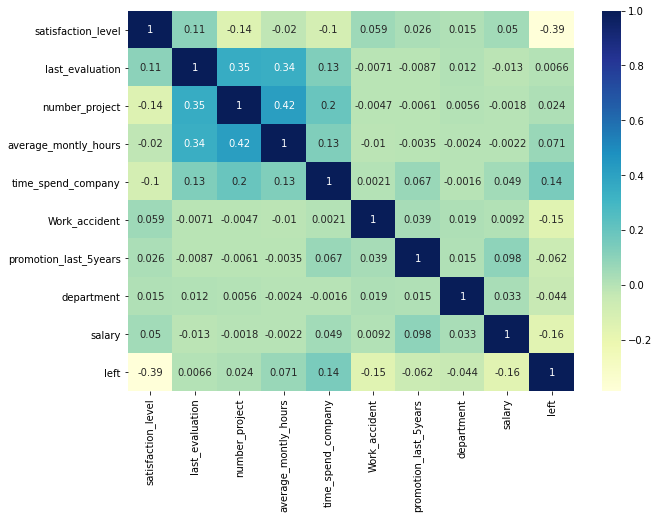

In [ ]:
# Heatmap Sample
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu",ax=ax)

In [ ]:
#Dropping categorical columns

In [ ]:
newdata = data.drop(['department','salary'],axis=1)
newdata.shape

(14999, 8)

In [ ]:
newdata.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
1,0.38,0.53,2.0,157.0,3.0,0.0,0.0,1.0
2,0.80,0.86,5.0,262.0,6.0,0.0,0.0,1.0


In [ ]:
def normalize(data):

  normalized_data  = data.copy()
  for x in range(normalized_data.shape[1]):
      minn = min(normalized_data.iloc[:,x])
      maxx = max(normalized_data.iloc[:,x])
      normalized_data.iloc[:,x] = normalized_data.iloc[:,x] - minn
      diff = maxx - minn
      normalized_data.iloc[:,x] = normalized_data.iloc[:,x] / diff

  return normalized_data

In [ ]:
normalized_data = normalize(newdata)
normalized_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
1,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,1.0
2,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,1.0
3,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,1.0
4,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,1.0
5,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,1.0


In [ ]:
normalized_data.left.unique()

array([1., 0.])

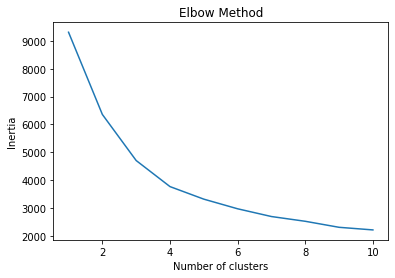

In [ ]:
#elbow method to find optimal number of clusters
wcss = []
k = range(1, 11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)    

plt.plot(k, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**According to elbow method graph optimal no of clusters are 4**

In [ ]:
#KMEANS clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans = kmeans.fit(normalized_data)

In [ ]:
#adding KNN cluster labels to data
#normalized_data['kmean_labels'] = kmeans.labels_
data['kmean_labels'] = kmeans.labels_

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,kmean_labels
1,0.38,0.53,2.0,157.0,3.0,0.0,0.0,0.0,0.0,1.0,0
2,0.80,0.86,5.0,262.0,6.0,0.0,0.0,0.0,1.0,1.0,2
3,0.11,0.88,7.0,272.0,4.0,0.0,0.0,0.0,1.0,1.0,2
4,0.72,0.87,5.0,223.0,5.0,0.0,0.0,0.0,0.0,1.0,2
5,0.37,0.52,2.0,159.0,3.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
pca = PCA(n_components=2)
pca= pca.fit(normalized_data)
lowDimData = pca.fit_transform(normalized_data)
lowDimData.shape

(14999, 2)

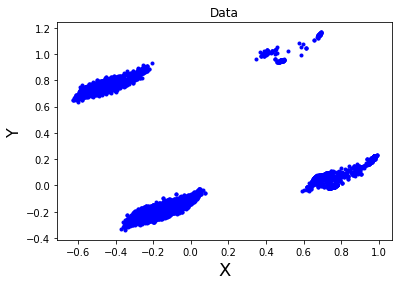

In [ ]:
lowDimData = pd.DataFrame(data=lowDimData)

plt.plot(lowDimData.iloc[:,0],lowDimData.iloc[:,1],"b.")
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.title('Data')
plt.show()

In [ ]:
lowDimData = pd.DataFrame(data=lowDimData)
lowDimData['kmean_labels'] = kmeans.labels_
datagroups = lowDimData.groupby('kmean_labels')

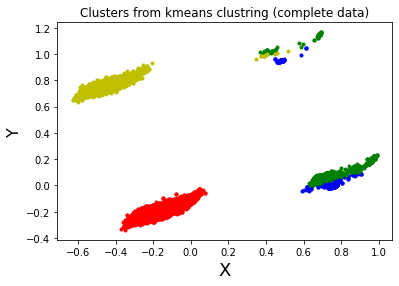

In [ ]:
plt.plot(datagroups.get_group(0).iloc[:,0],datagroups.get_group(0).iloc[:,1],'b.')
plt.plot(datagroups.get_group(1).iloc[:,0],datagroups.get_group(1).iloc[:,1],'r.')
plt.plot(datagroups.get_group(2).iloc[:,0],datagroups.get_group(2).iloc[:,1],'g.')
plt.plot(datagroups.get_group(3).iloc[:,0],datagroups.get_group(3).iloc[:,1],'y.')

plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.title('Clusters from kmeans clustring (complete data)')
plt.show()

In [ ]:
data_new = data.drop(['department'],axis=1)
groups = data_new.groupby('kmean_labels')

In [ ]:
groups.get_group(0).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,kmean_labels
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.0,1632.0
mean,0.415025,0.520705,2.077819,147.297181,3.051471,0.046569,0.009191,0.419118,1.0,0.0
std,0.070913,0.063042,0.392384,20.823436,0.342813,0.210778,0.095458,0.555516,0.0,0.0
min,0.100000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,0.380000,0.480000,2.000000,135.000000,3.000000,0.000000,0.000000,0.000000,1.0,0.0
50%,0.410000,0.510000,2.000000,145.000000,3.000000,0.000000,0.000000,0.000000,1.0,0.0
75%,0.440000,0.550000,2.000000,154.000000,3.000000,0.000000,0.000000,1.000000,1.0,0.0
max,0.890000,1.000000,6.000000,301.000000,6.000000,1.000000,1.000000,2.000000,1.0,0.0


In [ ]:
groups.get_group(1).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,kmean_labels
count,9428.000000,9428.000000,9428.000000,9428.000000,9428.000000,9428.0,9428.000000,9428.000000,9428.0,9428.0
mean,0.667122,0.716027,3.786169,198.991090,3.360416,0.0,0.024183,0.656767,0.0,1.0
std,0.216710,0.161592,0.975619,45.624039,1.531858,0.0,0.153626,0.655557,0.0,0.0
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.0,0.000000,0.000000,0.0,1.0
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.0,0.000000,0.000000,0.0,1.0
50%,0.690000,0.720000,4.000000,198.000000,3.000000,0.0,0.000000,1.000000,0.0,1.0
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.0,0.000000,1.000000,0.0,1.0
max,1.000000,1.000000,6.000000,287.000000,10.000000,0.0,1.000000,2.000000,0.0,1.0


In [ ]:
groups.get_group(2).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,kmean_labels
count,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.000000,1927.0,1927.0
mean,0.459175,0.884759,5.359107,258.280228,4.570835,0.042034,0.002076,0.411002,1.0,2.0
std,0.350847,0.090415,1.027528,30.319334,0.776097,0.200719,0.045525,0.521842,0.0,0.0
min,0.090000,0.450000,2.000000,132.000000,2.000000,0.000000,0.000000,0.000000,1.0,2.0
25%,0.100000,0.840000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,1.0,2.0
50%,0.460000,0.890000,5.000000,259.000000,5.000000,0.000000,0.000000,0.000000,1.0,2.0
75%,0.810000,0.950000,6.000000,278.000000,5.000000,0.000000,0.000000,1.000000,1.0,2.0
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,2.000000,1.0,2.0


In [ ]:
groups.get_group(3).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,kmean_labels
count,2012.000000,2012.000000,2012.000000,2012.000000,2012.000000,2012.0,2012.000000,2012.000000,2012.000000,2012.0
mean,0.666059,0.713415,3.791252,199.488569,3.479125,1.0,0.035785,0.622266,0.005964,3.0
std,0.218819,0.163720,0.997841,45.903097,1.695362,0.0,0.185801,0.652777,0.077017,0.0
min,0.120000,0.360000,2.000000,96.000000,2.000000,1.0,0.000000,0.000000,0.000000,3.0
25%,0.540000,0.580000,3.000000,161.000000,2.000000,1.0,0.000000,0.000000,0.000000,3.0
50%,0.680000,0.720000,4.000000,199.000000,3.000000,1.0,0.000000,1.000000,0.000000,3.0
75%,0.830000,0.850000,4.000000,238.000000,4.000000,1.0,0.000000,1.000000,0.000000,3.0
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.0,1.000000,2.000000,1.000000,3.0


In [ ]:
def myIsolationForest(Data):

  clf = IsolationForest(max_samples= round(Data.shape[0]*0.6)).fit(Data)
  pred = clf.predict(Data)
  outliers_IF = []
  inliers_IF = []
  n=0
  for x in range(Data.shape[0]):

    if(pred[x] == -1):
      n+=1
      outliers_IF.append(Data.iloc[x,:])
    if(pred[x] == 1):
      inliers_IF.append(Data.iloc[x,:])


  print('No of outliers in data=',n)

  return inliers_IF, outliers_IF

In [ ]:
inliers , outliers = myIsolationForest(normalized_data)
inliers = pd.DataFrame(data=inliers)

No of outliers in data= 2963


In [ ]:
#KMEANS clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans = kmeans.fit(inliers)

In [ ]:
pca = PCA(n_components=2)
pca= pca.fit(inliers)
lowDimData = pca.fit_transform(inliers)

In [ ]:
lowDimData = pd.DataFrame(data=lowDimData)
lowDimData['kmean_labels'] = kmeans.labels_
datagroups = lowDimData.groupby('kmean_labels')

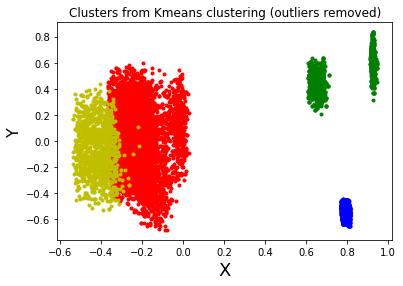

In [ ]:
plt.plot(datagroups.get_group(0).iloc[:,0],datagroups.get_group(0).iloc[:,1],'b.')
plt.plot(datagroups.get_group(1).iloc[:,0],datagroups.get_group(1).iloc[:,1],'r.')
plt.plot(datagroups.get_group(2).iloc[:,0],datagroups.get_group(2).iloc[:,1],'g.')
plt.plot(datagroups.get_group(3).iloc[:,0],datagroups.get_group(3).iloc[:,1],'y.')

plt.title('Clusters from Kmeans clustering (outliers removed)')
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.show()

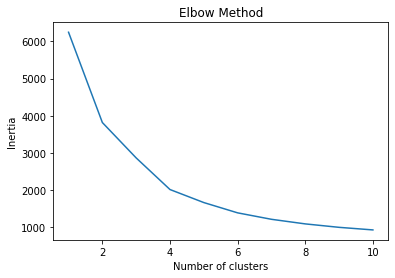

In [ ]:
#elbow method to find optimal number of clusters after removing outliers
wcss = []
k = range(1, 11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(inliers)
    wcss.append(kmeans.inertia_)
    

plt.plot(k, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
inliers_knn = inliers.copy()
inliers_knn['kmeans_labels'] = kmeans.labels_
inliers_groups = inliers_knn.groupby('kmeans_labels')

In [ ]:
inliers_groups.get_group(0).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,kmeans_labels
count,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.0,1566.0,1566.0
mean,0.717493,0.813388,0.339336,0.333915,0.122925,0.0,0.0,0.0,0.0
std,0.158684,0.111796,0.158501,0.102939,0.123577,0.0,0.0,0.0,0.0
min,0.340659,0.578125,0.000000,0.009346,0.000000,0.0,0.0,0.0,0.0
25%,0.593407,0.718750,0.200000,0.252336,0.000000,0.0,0.0,0.0,0.0
50%,0.714286,0.812500,0.400000,0.336449,0.125000,0.0,0.0,0.0,0.0
75%,0.846154,0.906250,0.400000,0.420561,0.125000,0.0,0.0,0.0,0.0
max,1.000000,1.000000,0.800000,0.528037,0.750000,0.0,0.0,0.0,0.0


In [ ]:
inliers_groups.get_group(1).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,kmeans_labels
count,1432.000000,1432.000000,1432.0,1432.000000,1432.000,1432.0,1432.0,1432.0,1432.0
mean,0.349408,0.235815,0.0,0.222390,0.125,0.0,0.0,1.0,1.0
std,0.033114,0.056305,0.0,0.047300,0.000,0.0,0.0,0.0,0.0
min,0.296703,0.140625,0.0,0.140187,0.125,0.0,0.0,1.0,1.0
25%,0.318681,0.187500,0.0,0.182243,0.125,0.0,0.0,1.0,1.0
50%,0.351648,0.234375,0.0,0.224299,0.125,0.0,0.0,1.0,1.0
75%,0.373626,0.281250,0.0,0.261682,0.125,0.0,0.0,1.0,1.0
max,0.406593,0.328125,0.0,0.303738,0.125,0.0,0.0,1.0,1.0


In [ ]:
inliers_groups.get_group(2).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,kmeans_labels
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.0,731.0,731.0,731.0
mean,0.797177,0.879980,0.526402,0.703766,0.391245,0.0,0.0,1.0,2.0
std,0.062423,0.089779,0.096518,0.073695,0.042061,0.0,0.0,0.0,0.0
min,0.626374,0.656250,0.400000,0.565421,0.375000,0.0,0.0,1.0,2.0
25%,0.747253,0.796875,0.400000,0.644860,0.375000,0.0,0.0,1.0,2.0
50%,0.802198,0.875000,0.600000,0.700935,0.375000,0.0,0.0,1.0,2.0
75%,0.846154,0.968750,0.600000,0.761682,0.375000,0.0,0.0,1.0,2.0
max,0.912088,1.000000,0.600000,0.841121,0.500000,0.0,0.0,1.0,2.0


In [ ]:
inliers_groups.get_group(3).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,kmeans_labels
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.0,1077.0,1077.0,1077.0
mean,0.685645,0.549661,0.340019,0.488342,0.102484,1.0,0.0,0.0,3.0
std,0.160499,0.218006,0.140118,0.180474,0.081111,0.0,0.0,0.0,0.0
min,0.153846,0.140625,0.200000,0.098131,0.000000,1.0,0.0,0.0,3.0
25%,0.560440,0.359375,0.200000,0.331776,0.000000,1.0,0.0,0.0,3.0
50%,0.681319,0.546875,0.400000,0.481308,0.125000,1.0,0.0,0.0,3.0
75%,0.813187,0.718750,0.400000,0.640187,0.125000,1.0,0.0,0.0,3.0
max,1.000000,1.000000,0.600000,0.831776,0.375000,1.0,0.0,0.0,3.0


In [ ]:
def LOC (Data):
    
  clf = LocalOutlierFactor(n_neighbors=(round(Data.shape[0]*0.1)))
  lof = clf.fit_predict(Data)
  n=0
  outliers_lof = []
  inliers_lof = []

  for x in range(Data.shape[0]):

    if(lof[x] == -1):
      n +=1
      outliers_lof.append(Data.iloc[x,:])
    else:
      inliers_lof.append(Data.iloc[x,:])
  print('No of outliers in data =',n)   

  return inliers_lof, outliers_lof

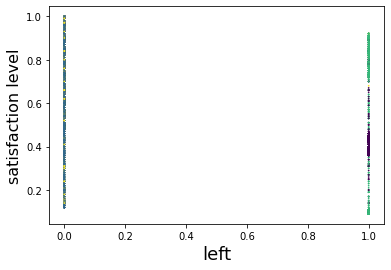

In [ ]:
area = 0.5
plt.scatter(data_new.iloc[:,8], data_new.iloc[:,0], s=area, c=data_new.iloc[:,9], alpha=1)
plt.xlabel('left', fontsize=18)
plt.ylabel('satisfaction level', fontsize=16)

plt.show()
#data.head()

In [ ]:
mydata = mydata.iloc[1:,:]
sample = mydata.sample(frac=0.05, random_state=1)
sample.shape

(750, 10)

In [ ]:
sample.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
count,750,750,750,750,750,750,750,750,750,750
unique,89,65,6,181,8,2,2,10,3,2
top,0.11,0.53,4,244,3,0,0,0,0,0
freq,18,25,202,13,326,654,731,215,375,552


In [ ]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2)


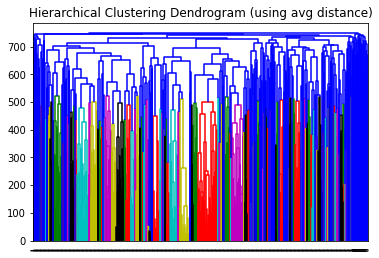

In [ ]:
clustering1 = AgglomerativeClustering(affinity='cosine',linkage='average').fit(sample)
print(clustering1)
plt.title('Hierarchical Clustering Dendrogram (using avg distance)')
plot_dendrogram(clustering1, labels=clustering1.labels_)
plt.show()

**From above dendrogram, it is visible that data has 4 clusters**

In [ ]:
agglocluster = AgglomerativeClustering(affinity='cosine',linkage='average',n_clusters=4).fit(mydata)

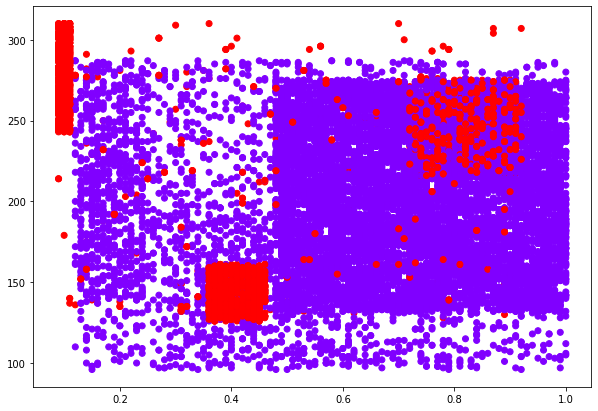

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(mydata.loc[:,'satisfaction_level'].astype(float), mydata.loc[:,'average_montly_hours'].astype(float), c=mydata.loc[:,"left"].astype(float), cmap='rainbow')

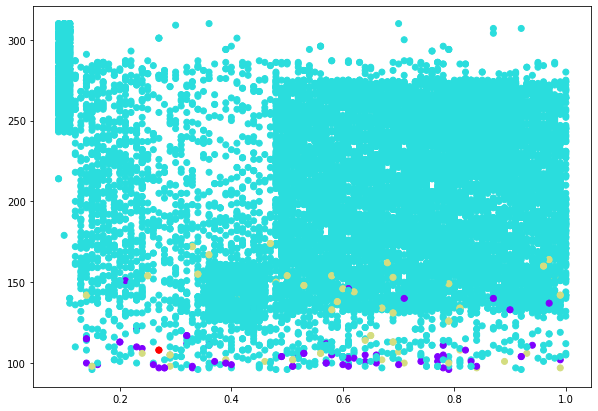

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(mydata.loc[:,'satisfaction_level'].astype(float), mydata.loc[:,'average_montly_hours'].astype(float), c=agglocluster.labels_, cmap='rainbow')

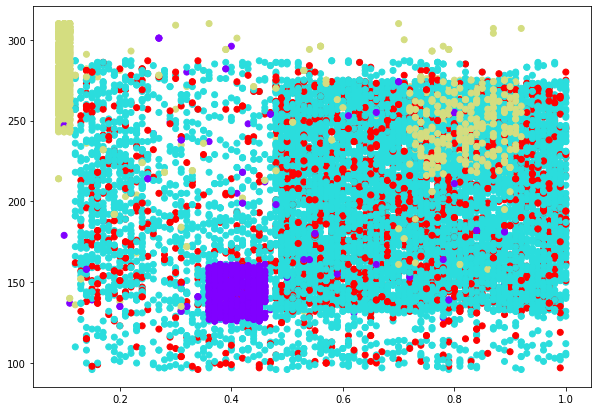

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_new.loc[:,'satisfaction_level'], data_new.loc[:,'average_montly_hours'], c=data_new.loc[:,'kmean_labels'], cmap='rainbow')

In [ ]:
#adding aggolmerative cluster labels to data
data['agglo_labels'] = cluster.labels_

**Visualising clusters from agglomerative clustering technique**

In [ ]:
pca = PCA(n_components=2)
pca= pca.fit(mydata)
lowDimData = pca.fit_transform(mydata)

In [ ]:
lowDimData = pd.DataFrame(data=lowDimData)
lowDimData['agglo_labels'] = agglocluster.labels_
datagroups = lowDimData.groupby('agglo_labels')

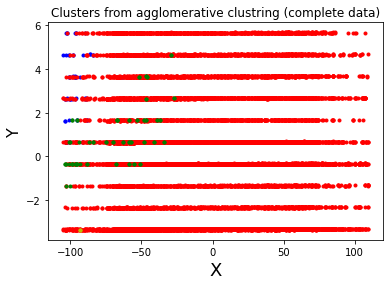

In [ ]:
plt.plot(datagroups.get_group(0).iloc[:,0],datagroups.get_group(0).iloc[:,1],'b.')
plt.plot(datagroups.get_group(1).iloc[:,0],datagroups.get_group(1).iloc[:,1],'r.')
plt.plot(datagroups.get_group(2).iloc[:,0],datagroups.get_group(2).iloc[:,1],'g.')
plt.plot(datagroups.get_group(3).iloc[:,0],datagroups.get_group(3).iloc[:,1],'y.')

plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.title('Clusters from agglomerative clustring (complete data)')
plt.show()

In [ ]:
inliers, outliers = myIsolationForest(mydata)

No of outliers in data= 3520


In [ ]:
inliers = pd.DataFrame(data=inliers)

In [ ]:
#agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
cluster.fit_predict(inliers)

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
pca = PCA(n_components=2)
pca= pca.fit(inliers)
lowDimData = pca.fit_transform(inliers)

In [ ]:
lowDimData = pd.DataFrame(data=lowDimData)
lowDimData['agglo_labels'] = cluster.labels_
datagroups = lowDimData.groupby('agglo_labels')

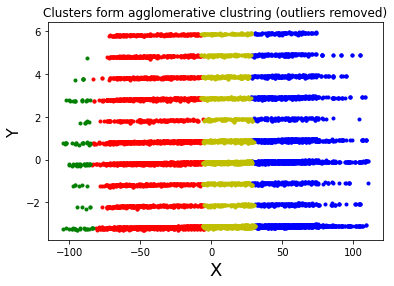

In [ ]:
plt.plot(datagroups.get_group(0).iloc[:,0],datagroups.get_group(0).iloc[:,1],'b.')
plt.plot(datagroups.get_group(1).iloc[:,0],datagroups.get_group(1).iloc[:,1],'r.')
plt.plot(datagroups.get_group(2).iloc[:,0],datagroups.get_group(2).iloc[:,1],'g.')
plt.plot(datagroups.get_group(3).iloc[:,0],datagroups.get_group(3).iloc[:,1],'y.')

plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.title('Clusters form agglomerative clustring (outliers removed)')
plt.show()

In [ ]:
inliers['agglo_labels'] = cluster.labels_

In [ ]:
inliers = convertData(inliers)

In [ ]:
groups = inliers.groupby('agglo_labels')

In [ ]:
groups.get_group(0).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,agglo_labels
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.0,3798.000000,3798.000000,3798.000000,3798.0
mean,0.623984,0.786811,4.316482,255.924697,3.501316,0.071353,0.0,3.123486,0.532912,0.313586,0.0
std,0.278582,0.148701,1.124533,16.883452,1.133387,0.257448,0.0,2.584933,0.579108,0.464011,0.0
min,0.090000,0.360000,2.000000,228.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.520000,0.670000,3.000000,243.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.710000,0.820000,4.000000,255.000000,3.000000,0.000000,0.0,3.000000,0.000000,0.000000,0.0
75%,0.840000,0.910000,5.000000,267.000000,4.000000,0.000000,0.0,4.000000,1.000000,1.000000,0.0
max,1.000000,1.000000,7.000000,310.000000,8.000000,1.000000,0.0,9.000000,2.000000,1.000000,0.0


In [ ]:
groups.get_group(1).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,agglo_labels
count,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.000000,5382.0,5382.000000,5382.000000,5382.000000,5382.0
mean,0.611301,0.659942,3.259197,157.825715,3.030286,0.078781,0.0,3.174099,0.522668,0.255667,1.0
std,0.205529,0.160567,1.050961,18.758684,0.866703,0.269422,0.0,2.714634,0.572026,0.436276,0.0
min,0.120000,0.360000,2.000000,116.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0
25%,0.430000,0.520000,2.000000,143.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0
50%,0.600000,0.620000,3.000000,156.000000,3.000000,0.000000,0.0,3.000000,0.000000,0.000000,1.0
75%,0.780000,0.790000,4.000000,173.000000,3.000000,0.000000,0.0,5.000000,1.000000,1.000000,1.0
max,1.000000,1.000000,6.000000,195.000000,8.000000,1.000000,0.0,9.000000,2.000000,1.000000,1.0


In [ ]:
groups.get_group(2).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,agglo_labels
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.000000,111.0,111.0
mean,0.576216,0.649640,3.531532,107.918919,3.477477,0.018018,0.0,3.135135,0.486486,0.0,2.0
std,0.179707,0.146442,0.882350,5.320860,0.998607,0.133620,0.0,2.146822,0.502084,0.0,0.0
min,0.140000,0.370000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.0,2.0
25%,0.450000,0.535000,3.000000,104.000000,3.000000,0.000000,0.0,1.500000,0.000000,0.0,2.0
50%,0.570000,0.640000,3.000000,108.000000,3.000000,0.000000,0.0,3.000000,0.000000,0.0,2.0
75%,0.700000,0.750000,4.000000,113.000000,4.000000,0.000000,0.0,4.000000,1.000000,0.0,2.0
max,0.930000,0.960000,5.000000,117.000000,6.000000,1.000000,0.0,8.000000,1.000000,0.0,2.0


In [ ]:
groups.get_group(3).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,agglo_labels
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.0,2184.000000,2184.000000,2184.000000,2184.0
mean,0.702930,0.738022,3.811355,212.145147,3.135531,0.104853,0.0,3.124084,0.568681,0.058608,3.0
std,0.195142,0.155808,0.848668,10.465592,1.083733,0.306435,0.0,2.727456,0.601456,0.234943,0.0
min,0.120000,0.370000,2.000000,193.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.0
25%,0.590000,0.600000,3.000000,203.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.0
50%,0.730000,0.740000,4.000000,212.000000,3.000000,0.000000,0.0,3.000000,1.000000,0.000000,3.0
75%,0.850000,0.870000,4.000000,222.000000,4.000000,0.000000,0.0,5.000000,1.000000,0.000000,3.0
max,1.000000,1.000000,6.000000,231.000000,8.000000,1.000000,0.0,9.000000,2.000000,1.000000,3.0


In [ ]:
brc = Birch(n_clusters=4)
brc.fit(normalized_data)
birch_labels = brc.predict(normalized_data)

In [ ]:
pca = PCA(n_components=2)
pca= pca.fit(normalized_data)
lowDimData = pca.fit_transform(normalized_data)

In [ ]:
lowDimData = pd.DataFrame(data=lowDimData)
lowDimData['birch_labels'] = birch_labels
datagroups = lowDimData.groupby('birch_labels')

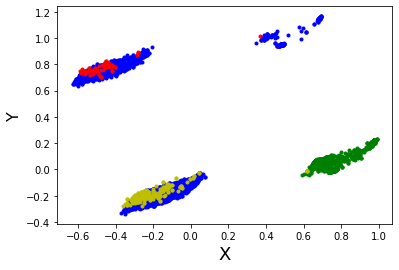

In [ ]:
plt.plot(datagroups.get_group(0).iloc[:,0],datagroups.get_group(0).iloc[:,1],'b.')
plt.plot(datagroups.get_group(1).iloc[:,0],datagroups.get_group(1).iloc[:,1],'r.')
plt.plot(datagroups.get_group(2).iloc[:,0],datagroups.get_group(2).iloc[:,1],'g.')
plt.plot(datagroups.get_group(3).iloc[:,0],datagroups.get_group(3).iloc[:,1],'y.')

plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.show()

In [ ]:
#adding BIRCH cluster labels to data
data_new = data.drop(['department'],axis=1)
data_new['birch_labels'] = birch_labels

In [ ]:
groups = data_new.groupby('birch_labels')

In [ ]:
groups.get_group(0).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,birch_labels
count,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000,11296.000000,11296.0
mean,0.663461,0.715516,3.786385,199.084720,3.365262,0.185552,0.000266,0.636686,0.014873,0.0
std,0.219957,0.162406,0.994075,45.864575,1.529145,0.388762,0.016295,0.650464,0.121048,0.0
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.530000,0.580000,3.000000,161.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.690000,0.720000,4.000000,198.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,7.000000,309.000000,10.000000,1.000000,1.000000,2.000000,1.000000,0.0


In [ ]:
groups.get_group(1).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,birch_labels
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.0,73.0,73.000000,73.000000,73.0
mean,0.665890,0.724521,3.684932,216.095890,4.178082,1.0,1.0,1.000000,0.013699,1.0
std,0.194785,0.206337,1.165198,47.622988,1.924567,0.0,0.0,0.645497,0.117041,0.0
min,0.160000,0.380000,2.000000,100.000000,2.000000,1.0,1.0,0.000000,0.000000,1.0
25%,0.570000,0.550000,3.000000,183.000000,3.000000,1.0,1.0,1.000000,0.000000,1.0
50%,0.650000,0.800000,4.000000,222.000000,3.000000,1.0,1.0,1.000000,0.000000,1.0
75%,0.790000,0.880000,4.000000,259.000000,6.000000,1.0,1.0,1.000000,0.000000,1.0
max,1.000000,1.000000,6.000000,275.000000,10.000000,1.0,1.0,2.000000,1.000000,1.0


In [ ]:
groups.get_group(2).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,birch_labels
count,3399.000000,3399.000000,3399.000000,3399.000000,3399.00000,3399.0,3399.000000,3399.000000,3399.0,3399.0
mean,0.439444,0.718308,3.858782,207.603119,3.87614,0.0,0.003530,0.413945,1.0,2.0
std,0.263392,0.197760,1.824415,61.317451,0.97871,0.0,0.059321,0.539379,0.0,0.0
min,0.090000,0.450000,2.000000,126.000000,2.00000,0.0,0.000000,0.000000,1.0,2.0
25%,0.120000,0.520000,2.000000,146.000000,3.00000,0.0,0.000000,0.000000,1.0,2.0
50%,0.410000,0.790000,4.000000,225.000000,4.00000,0.0,0.000000,0.000000,1.0,2.0
75%,0.725000,0.900000,6.000000,262.000000,5.00000,0.0,0.000000,1.000000,1.0,2.0
max,0.920000,1.000000,7.000000,310.000000,6.00000,0.0,1.000000,2.000000,1.0,2.0


In [ ]:
groups.get_group(3).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,birch_labels
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.0,231.0,231.000000,231.000000,231.0
mean,0.671688,0.709610,3.835498,195.995671,4.225108,0.0,1.0,1.073593,0.012987,3.0
std,0.209079,0.154915,0.936573,46.568930,2.286344,0.0,0.0,0.645213,0.113464,0.0
min,0.150000,0.370000,2.000000,102.000000,2.000000,0.0,1.0,0.000000,0.000000,3.0
25%,0.530000,0.590000,3.000000,152.000000,3.000000,0.0,1.0,1.000000,0.000000,3.0
50%,0.720000,0.710000,4.000000,196.000000,3.000000,0.0,1.0,1.000000,0.000000,3.0
75%,0.820000,0.820000,4.000000,233.000000,6.000000,0.0,1.0,1.000000,0.000000,3.0
max,1.000000,1.000000,6.000000,286.000000,10.000000,0.0,1.0,2.000000,1.000000,3.0


In [ ]:
inliers , outliers = myIsolationForest(normalized_data)
inliers = pd.DataFrame(data=inliers)

No of outliers in data= 3119


In [ ]:
brc = Birch(n_clusters=4)
brc.fit(inliers)
birch_labels = brc.predict(inliers)

In [ ]:
pca = PCA(n_components=2)
pca= pca.fit(inliers.iloc[:,0:8])
lowDimData = pca.fit_transform(inliers)

In [ ]:
lowDimData = pd.DataFrame(data=lowDimData)
lowDimData['birch_labels'] = birch_labels
datagroups = lowDimData.groupby('birch_labels')

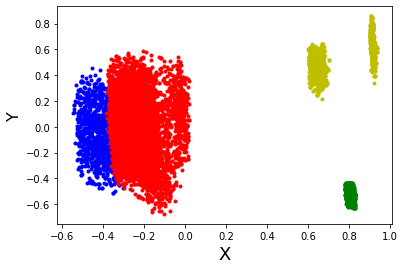

In [ ]:
plt.plot(datagroups.get_group(0).iloc[:,0],datagroups.get_group(0).iloc[:,1],'b.')
plt.plot(datagroups.get_group(1).iloc[:,0],datagroups.get_group(1).iloc[:,1],'r.')
plt.plot(datagroups.get_group(2).iloc[:,0],datagroups.get_group(2).iloc[:,1],'g.')
plt.plot(datagroups.get_group(3).iloc[:,0],datagroups.get_group(3).iloc[:,1],'y.')

plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=16)
plt.show()

In [ ]:
inliers['birch_labels'] = birch_labels
inliers_groups = inliers.groupby('birch_labels')

In [ ]:
inliers_groups.get_group(0).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,birch_labels
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.0,1053.0,1053.0,1053.0
mean,0.684470,0.558983,0.340171,0.494191,0.099359,1.0,0.0,0.0,0.0
std,0.155340,0.215519,0.139903,0.183622,0.078386,0.0,0.0,0.0,0.0
min,0.241758,0.156250,0.000000,0.065421,0.000000,1.0,0.0,0.0,0.0
25%,0.560440,0.375000,0.200000,0.331776,0.000000,1.0,0.0,0.0,0.0
50%,0.681319,0.562500,0.400000,0.485981,0.125000,1.0,0.0,0.0,0.0
75%,0.813187,0.734375,0.400000,0.649533,0.125000,1.0,0.0,0.0,0.0
max,0.989011,0.984375,0.600000,0.831776,0.375000,1.0,0.0,0.0,0.0


In [ ]:
inliers_groups.get_group(1).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,birch_labels
count,7970.000000,7970.000000,7970.000000,7970.000000,7970.000000,7970.0,7970.0,7970.0,7970.0
mean,0.655512,0.565598,0.349611,0.489418,0.130050,0.0,0.0,0.0,1.0
std,0.217537,0.238998,0.172295,0.199200,0.125235,0.0,0.0,0.0,0.0
min,0.032967,0.015625,0.000000,0.009346,0.000000,0.0,0.0,0.0,1.0
25%,0.516484,0.359375,0.200000,0.322430,0.000000,0.0,0.0,0.0,1.0
50%,0.670330,0.562500,0.400000,0.481308,0.125000,0.0,0.0,0.0,1.0
75%,0.824176,0.765625,0.400000,0.663551,0.125000,0.0,0.0,0.0,1.0
max,1.000000,1.000000,0.800000,0.892523,0.750000,0.0,0.0,0.0,1.0


In [ ]:
inliers_groups.get_group(2).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,birch_labels
count,1432.000000,1432.000000,1432.0,1432.000000,1432.000,1432.0,1432.0,1432.0,1432.0
mean,0.349408,0.235815,0.0,0.222390,0.125,0.0,0.0,1.0,2.0
std,0.033114,0.056305,0.0,0.047300,0.000,0.0,0.0,0.0,0.0
min,0.296703,0.140625,0.0,0.140187,0.125,0.0,0.0,1.0,2.0
25%,0.318681,0.187500,0.0,0.182243,0.125,0.0,0.0,1.0,2.0
50%,0.351648,0.234375,0.0,0.224299,0.125,0.0,0.0,1.0,2.0
75%,0.373626,0.281250,0.0,0.261682,0.125,0.0,0.0,1.0,2.0
max,0.406593,0.328125,0.0,0.303738,0.125,0.0,0.0,1.0,2.0


In [ ]:
inliers_groups.get_group(3).describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,birch_labels
count,1425.000000,1425.000000,1425.000000,1425.000000,1425.000000,1425.0,1425.0,1425.0,1425.0
mean,0.403193,0.837840,0.681825,0.773428,0.320965,0.0,0.0,1.0,3.0
std,0.394862,0.099324,0.180081,0.106854,0.074197,0.0,0.0,0.0,0.0
min,0.000000,0.640625,0.400000,0.565421,0.250000,0.0,0.0,1.0,3.0
25%,0.010989,0.765625,0.600000,0.696262,0.250000,0.0,0.0,1.0,3.0
50%,0.021978,0.843750,0.600000,0.761682,0.375000,0.0,0.0,1.0,3.0
75%,0.802198,0.921875,0.800000,0.850467,0.375000,0.0,0.0,1.0,3.0
max,0.912088,1.000000,1.000000,1.000000,0.500000,0.0,0.0,1.0,3.0


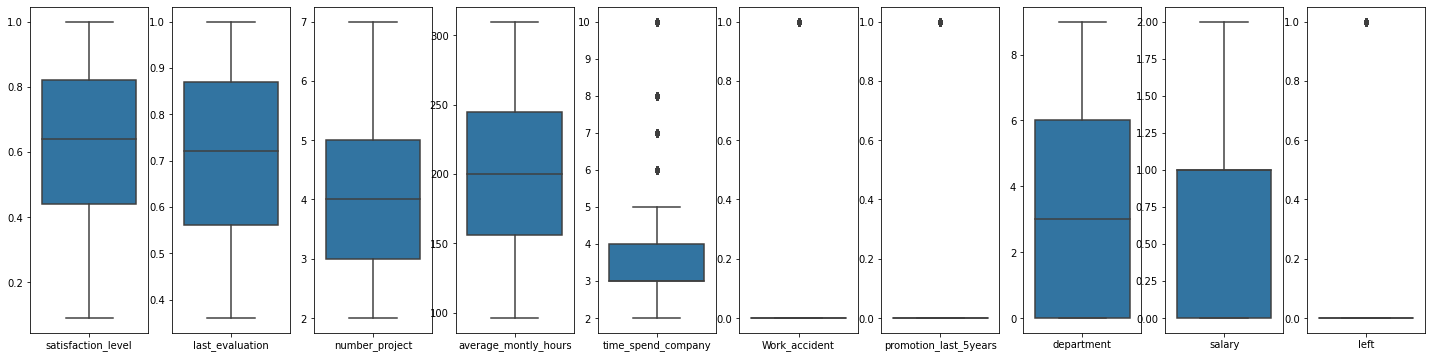

In [ ]:
#boxplots for outlier 
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(nrows=1,ncols=10,figsize=(25,6))
sns.boxplot(data = data.iloc[:,0:1],ax=ax1)
sns.boxplot(data = data.iloc[:,1:2],ax=ax2)
sns.boxplot(data = data.iloc[:,2:3],ax=ax3)
sns.boxplot(data = data.iloc[:,3:4],ax=ax4)
sns.boxplot(data = data.iloc[:,4:5],ax=ax5)
sns.boxplot(data = data.iloc[:,5:6],ax=ax6)
sns.boxplot(data = data.iloc[:,6:7],ax=ax7)
sns.boxplot(data = data.iloc[:,7:8],ax=ax8)
sns.boxplot(data = data.iloc[:,8:9],ax=ax9)
sns.boxplot(data = data.iloc[:,9:10],ax=ax10)